In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


In [39]:
# Boston Housing Pricess Dataset
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

#Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [7]:
# Examples and features

print("Training set: {}".format(train_data.shape))
print("Training set: {}".format(test_data.shape))

Training set: (404, 13)
Training set: (102, 13)


In [8]:
print(train_data[0]) # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [9]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [10]:
print(train_labels[0:10]) # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [41]:
# Normalize features
mean = train_data.mean(axis = 0)
std = train_data.mean(axis = 0)
train_data = (train_data - mean)/std
test_data = (test_data - mean)/std

print(train_data[0]) # First training sample, normalized

[-0.97897258  2.91979301 -0.69021374 -1.         -0.21594089  0.08216238
 -0.40443969  0.01292131 -0.47037231 -0.01945933 -0.17731067  0.11017104
 -0.47570081]


In [25]:
keras.backend.clear_session()

In [26]:
# create a model

def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=64,activation=tf.nn.relu, input_shape = (train_data.shape[1],)))
    model.add(keras.layers.Dense(units=64,activation=tf.nn.relu))
    model.add(keras.layers.Dense(units=1))
    
    model.compile(loss='mse', optimizer= tf.train.RMSPropOptimizer(0.001), metrics=['mae'])
    
    return model

model = build_model()
model.summary()
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Train Model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

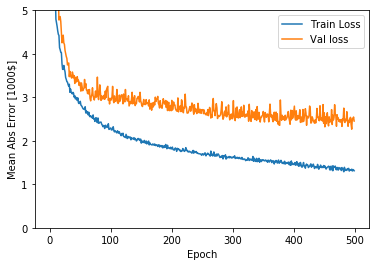

In [28]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

In [68]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop])

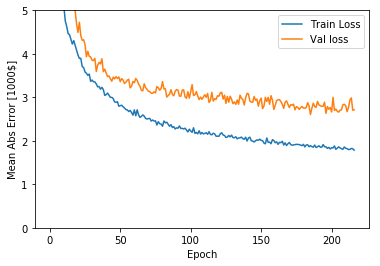

In [30]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

In [46]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae*1000))



Testing set Mean Abs Error: $2789.15


In [51]:
# Predict

test_predictions =model.predict(test_data).flatten()

In [52]:
test_predictions

array([10.317654 , 19.82513  , 22.143305 , 34.27933  , 25.093668 ,
       21.889242 , 26.451714 , 22.69861  , 21.083023 , 22.319008 ,
       16.17268  , 16.497297 , 17.431276 , 42.300613 , 18.62506  ,
       20.751642 , 25.604355 , 20.735155 , 18.642927 , 26.111021 ,
       11.586166 , 16.017591 , 21.930302 , 15.389661 , 21.636404 ,
       25.440714 , 31.18987  , 29.499762 , 11.436983 , 19.91835  ,
       21.17758  , 13.415831 , 34.322113 , 24.36226  , 16.529936 ,
        8.162704 , 17.022081 , 19.719217 , 19.03965  , 25.988928 ,
       28.610773 , 29.048191 , 13.479105 , 42.271664 , 32.243145 ,
       25.616123 , 27.65644  , 19.92283  , 25.123064 , 23.7564   ,
       31.73271  , 20.652311 , 11.566143 , 16.33169  , 33.945656 ,
       27.851992 , 12.894854 , 45.034607 , 36.338318 , 23.002352 ,
       26.162388 , 15.940206 , 14.896444 , 20.835747 , 23.663105 ,
       23.153254 , 12.995106 , 23.076502 , 13.487305 ,  9.145226 ,
       23.795374 , 28.823557 , 24.917862 , 14.064178 , 24.9815

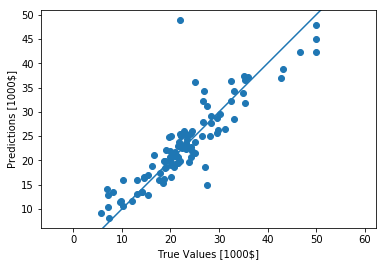

In [64]:
plt.scatter(x=test_labels,y=test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])


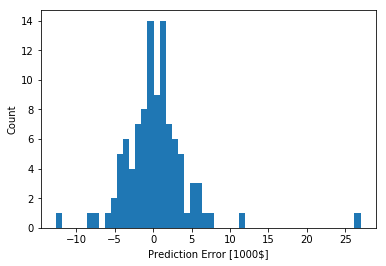

In [67]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count")
_ = plt.plot()